<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/wilmanski/Zaj%C4%99cia2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import math
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from termcolor import colored

In [7]:
#zaczytaj dane z pliku csv
df_train = pd.read_csv("train.csv", sep = "," , encoding= 'utf-8')
#sprawdź liczbę kolumn i wierszy
df.shape
df.info()
#wyświetl część tabeli
df_train.head()
#usuń wiersze z duplikatami id
df.drop_duplicates(subset="ID", inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

0x1602     1
0x1672     1
0x1607     1
0x1608     1
0x1609     1
          ..
0x25feb    1
0x25fec    1
0x25fdf    1
0x25fcf    1
0x25fed    1
Name: ID, Length: 100000, dtype: Int64
CUS_0xd40     8
CUS_0x75c6    8
CUS_0x5b48    8
CUS_0xc0ab    8
CUS_0x2dbc    8
             ..
CUS_0xb11c    8
CUS_0xad4f    8
CUS_0x51b3    8
CUS_0x2084    8
CUS_0x942c    8
Name: Customer_ID, Length: 12500, dtype: Int64
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: Int64
Langep                44
Stevex                44
Vaughanl              39
Jessicad              39
Raymondr              38
                      ..
Doris Frankely         4
Vinocurw               4
Josephine Masonz       4
Olesya Dmitracovaq     4
Timothyl               3
Name: Name, Length: 10139, dtype: Int64
38      2994
28      2968
31      2955
26      2945
32      2884
        ... 
1908       1
4583       1
7549  

<Axes: xlabel='count', ylabel='Credit_Score'>

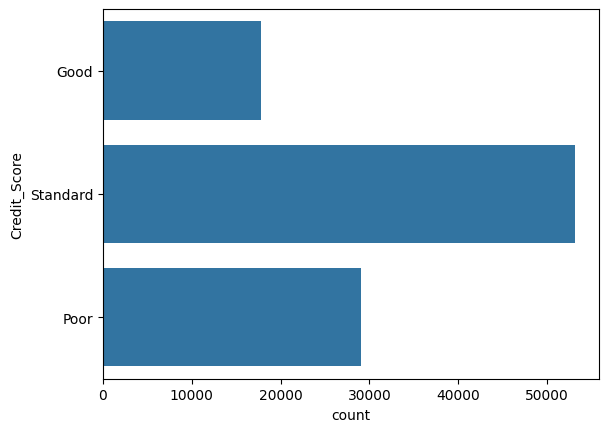

In [ ]:
#opisz statystyki danych
df.describe()
#zlicz różne wartości danych
for i in df.columns:
  print(df[i].value_counts())
print('*'*50)
# pokaż liczności danych kategorycznych
sns.countplot(df['Credit_Score'])
#zastąp błędne dane

In [ ]:
df.info()
#zmień dane na numeryczne
FeaturesToConvert = ['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit','Outstanding_Debt','Amount_invested_monthly','Monthly_Balance']
# ale najpierw sprawdź czy nie ma błędów w danych
for feature in FeaturesToConvert:
  uniques = df[feature].unique()
  print('Feature:','\n', colored(feature, attrs =['bold']), '\n', uniques,'\n','--'*40,'\n')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  string 
 1   Customer_ID               100000 non-null  string 
 2   Month                     100000 non-null  string 
 3   Name                      90015 non-null   string 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  string 
 6   Occupation                100000 non-null  string 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              88592 non-null   st

In [ ]:
# usuń zbędne znaki '-’ , '_'
for feature in FeaturesToConvert:
  df[feature] = df[feature].replace('-', '', regex=True).replace('_','', regex=True)
# puste kolumny zastąp NAN
for feature in FeaturesToConvert:
  df[feature] = df[feature].replace({'':np.nan})
# zmien typ zmiennych ilościowych
for feature in FeaturesToConvert:
  df[feature] = df[feature].astype('float64')

In [ ]:
#uzupełnij braki średnią
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].fillna(method='pad')

In [ ]:
average_age = df['Age'].mean()
print(average_age)

110.6497


In [ ]:
common_month = df['Month'].mode()
print(common_month)

0       April
1      August
2    February
3     January
4        July
5        June
6       March
7         May
Name: Month, dtype: string


In [5]:
from sklearn.preprocessing import LabelEncoder
# stwórz obiekt enkodera
le = LabelEncoder()
df_train.Occupation = le.fit_transform(df_train.Occupation)
# sprawdź transformacje
df_train.head()

NameError: name 'df_train' is not defined

In [ ]:
cols = ['workex', 'status', 'hsc_s', 'degree_t']
# Encode labels of multiple columns at once
df_train[cols] = df_train[cols].apply(LabelEncoder().fit_transform)
# Print head
df_train.head()